# Least-Squares Regression - University GPA
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**

In [6]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [7]:
def rsquared(xi, yi, ymodel):
    '''
    xi: vector of length n representing the known x values.
    yi: vector of length n representing the known y values that correspond to xi.
    ymodel: a python function (of x only) that can be evaluated at xi and represents a model fit of 
            the data (e.g. a regressed curve).
    '''
    ybar = np.average(yi)
    fi = ymodel(xi)
    result = 1 - np.sum( (yi - fi)**2 )/np.sum( (yi - ybar)**2 )
    return result

In [8]:
data=np.loadtxt('gpa_data.txt').T

In [9]:
# high school gpa
hsGPA = data[0]

# university gpa
univGPA = data[4]

In [10]:
xi = hsGPA
yi = univGPA

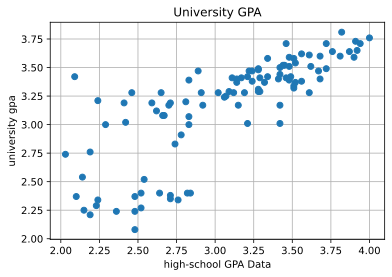

In [11]:
plt.plot(xi, yi, 'o')
plt.xlabel('high-school GPA Data')
plt.ylabel('university gpa')
plt.title('University GPA')
plt.grid()

## Straight-line Fit using the Normal Equations
For a straight line model, we have to fit
\begin{equation}
y = a_0 + a_1 x
\end{equation}
\begin{equation}
\left[ {\begin{array}{*{20}{c}}
1&{x_1}\\
1&{x_2}\\
\vdots & \vdots \\
1&{x_n}
\end{array}} 
\right]\left( \begin{array}{l}
{a_0}\\
{a_1}
\end{array} \right) = \left( {\begin{array}{*{20}{c}}
{y_1}\\
{y_2}\\
 \vdots \\
{y_n}
\end{array}} \right)
\end{equation}
To solve this system in the least-squares sense using the Normal equations, we have to solve the following
\begin{equation}
[\mathbf{A}]^T [\mathbf{A}] \mathbf{a} = [\mathbf{A}]^T \mathbf{b}
\end{equation}

In [12]:
N = len(xi)
A = np.column_stack([ np.ones(N), xi ])

In [13]:
ATA = A.T @ A
rhs = A.T @ yi

Solve the system of equations!

In [14]:
sol = np.linalg.solve(ATA, rhs)
print(sol)

[1.09682328 0.6748299 ]


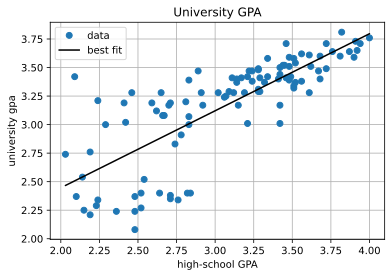

In [15]:
a0 = sol[0]
a1 = sol[1]

def linearfit(x):
    return a0 + a1*x

# Plot original Data
plt.plot(xi, yi, 'o', label='data')
# Plot regressed fit
plt.plot(xi, linearfit(xi), 'k-', label='best fit')
plt.xlabel('high-school GPA')
plt.ylabel('university gpa')
plt.title('University GPA')
plt.legend()
plt.grid()

In [16]:
linearfit(3.3)

3.323761963170983

In [17]:
r2line = rsquared(xi,yi,linearfit)
print(r2line)

0.6077186589199637


## Quadratic fit
For a quadratic fit, we use the following model:
\begin{equation}
y = a_0 + a_1 x + a_2 x^2
\end{equation}
The normal equations in this case are
\begin{equation}
\left[ {\begin{array}{*{20}{c}}
1&{x_1} & {x_1^2}\\
1&{x_2} & {x_2^2}\\
 \vdots & \vdots & \vdots\\
1&{x_n} & x_n^2
\end{array}} \right]\left( \begin{array}{l}
{a_0}\\
{a_1} \\
a_2
\end{array} \right) = \left( {\begin{array}{*{20}{c}}
{y_1}\\
{y_2}\\
 \vdots \\
{y_n}
\end{array}} \right)
\end{equation}
To solve this system in the least-squares sense, we have to solve the following system
\begin{equation}
[\mathbf{A}]^\text{T} [\mathbf{A}]  \mathbf{a} = [\mathbf{A}]^\text{T} \mathbf{b}
\end{equation}

In [20]:
A = np.column_stack([ np.ones(N), xi, xi**2 ])
ATA = A.T @ A
rhs   = A.T @ yi
sol = np.linalg.solve(ATA,rhs)
print(sol)

[ 0.97314251  0.75950032 -0.01406161]


In [21]:
a0 = sol[0]
a1 = sol[1]
a2 = sol[2]
def quadfit(x):
    return a0 + a1*x + a2*x**2

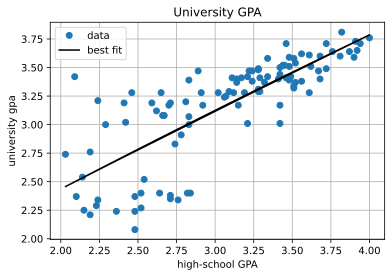

In [23]:
# plot original data
plt.plot(xi, yi, 'o', label='data')
# plot quad fit
plt.plot(xi, quadfit(xi), 'k-', label='best fit')
plt.xlabel('high-school GPA')
plt.ylabel('university gpa')
plt.title('University GPA')
plt.legend()
plt.grid()

In [24]:
rsquared(xi,yi,quadfit)

0.6077867092534326